# Relevant Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Dataset

In [107]:
data=pd.read_csv("olympics-Rio.csv")
data.drop(columns="id",axis=1,inplace=True)
data.head(5)

,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


# Creating a new Field

In [108]:
data["Total"]=data["gold"]+data["silver"]+data["bronze"]

In [109]:
data.dtypes

name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
Total            int64
dtype: object

In [110]:
data["dob"]=pd.to_datetime(data["dob"])

In [111]:
data.isnull().sum()

name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
Total            0
dtype: int64

# Dealing with missing Values

In [112]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data[["height","weight"]])
data[["height","weight"]] = imputer.transform(data[["height","weight"]])

In [113]:
data.isnull().sum()

name           0
nationality    0
sex            0
dob            1
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
Total          0
dtype: int64

In [114]:
data=data.fillna("missing")
data.isnull().sum()

name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
Total          0
dtype: int64

# Number of athletes per sport

In [115]:
data["sport"].value_counts()

athletics            2363
aquatics             1445
football              611
rowing                547
cycling               525
hockey                432
judo                  392
shooting              390
volleyball            384
sailing               380
handball              363
wrestling             353
canoe                 331
gymnastics            324
rugby sevens          300
basketball            288
boxing                286
weightlifting         258
fencing               246
equestrian            222
tennis                196
badminton             172
table tennis          172
archery               128
taekwondo             128
golf                  120
triathlon             110
modern pentathlon      72
Name: sport, dtype: int64

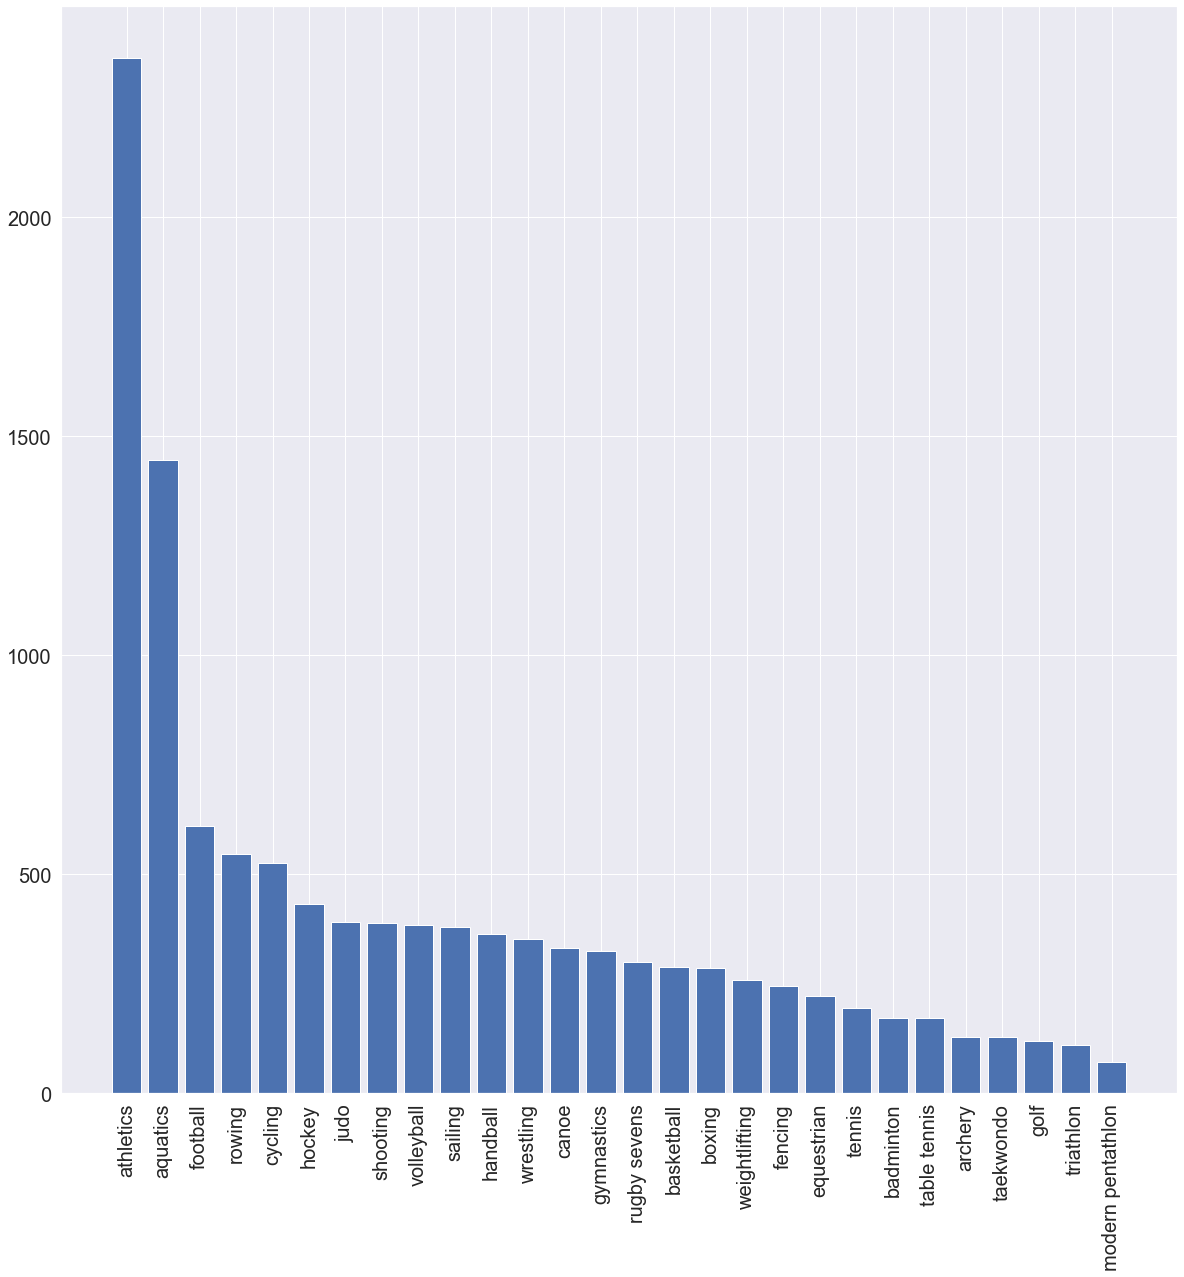

In [116]:
plt.figure(figsize=(20,20))
plt.bar(data["sport"].value_counts().to_frame().index,data["sport"].value_counts())
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.show()

# Male vs Female Athletes

In [117]:
data["sex"].value_counts()

male      6333
female    5205
Name: sex, dtype: int64

6333 male athletes participated 

5205 female athletes participated

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text yticklabel objects>)

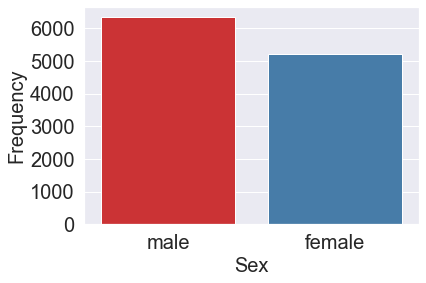

In [118]:
sns.countplot(data["sex"],palette="Set1")
plt.xlabel("Sex",size=20)
plt.ylabel("Frequency",size=20)
plt.xticks(size=20)
plt.yticks(size=20)

# Participation By Country

In [119]:
data["nationality"].nunique()

207

 207 nations participated in the games

In [120]:
data["nationality"].value_counts().head(5)

USA    567
BRA    485
GER    441
AUS    431
FRA    410
Name: nationality, dtype: int64

United States , Brazil , Germany ,Australia and France sent the highest number of athletes

In [121]:
mask1= data["nationality"]!="USA"
mask2=data["nationality"]!="BRA"
mask3=data["nationality"]!="AUS"
mask4=data["nationality"]!="FRA"
mask5=data["nationality"]!="GER"
mask6=data["nationality"]!="CHN"
mask7=data["nationality"]!="GBR"
mask8=data["nationality"]!="JPN"
mask9=data["nationality"]!="CAN"
mask10=data["nationality"]!="ESP"
mask11=data["nationality"]!="ITA"
mask12=data["nationality"]!="RUS"
mask13=data["nationality"]!="NED"
mask14=data["nationality"]!="POL"
mask15=data["nationality"]!="ARG"


In [122]:
data[mask1 & mask2 & mask3 & mask4 & mask5 & mask6 & mask7 & mask8 & mask9 & mask10 & mask11 & mask12 & mask13 & mask14 & mask15 ]["nationality"].value_counts().sum()

6134

In [123]:
df=pd.DataFrame(data=data["nationality"].value_counts().head(15))

In [124]:
df.loc["OTHERS",:]=6134
df

,nationality
USA,567.0
BRA,485.0
GER,441.0
AUS,431.0
FRA,410.0
CHN,404.0
GBR,374.0
JPN,346.0
CAN,321.0
ESP,313.0


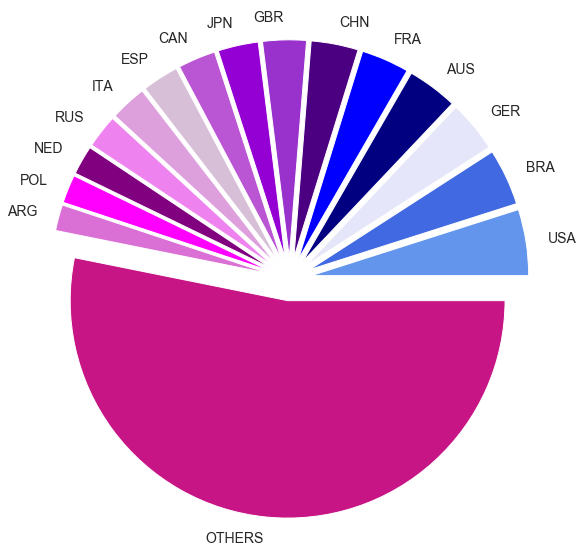

In [125]:
plt.figure(figsize=(10,10))
color_coding=["cornflowerblue","royalblue","lavender","navy","blue","indigo","darkorchid","darkviolet","mediumorchid",
              "thistle","plum","violet","purple","magenta","orchid","mediumvioletred"]
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
           
plt.pie(df["nationality"],explode=explode,labels=df["nationality"].index,colors=color_coding,textprops={'fontsize': 14})

plt.show()

# Atheletes From India

In [126]:
mask1=data["nationality"]=="IND"
Ind=pd.DataFrame(data[mask1]["sport"].value_counts())
Ind

,sport
hockey,36
athletics,34
shooting,12
wrestling,9
badminton,7
archery,4
table tennis,4
tennis,4
golf,3
boxing,3


In [127]:
Ind.index

Index(['hockey', 'athletics', 'shooting', 'wrestling', 'badminton', 'archery',
       'table tennis', 'tennis', 'golf', 'boxing', 'aquatics', 'weightlifting',
       'rowing', 'gymnastics', 'judo'],
      dtype='object')

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text yticklabel objects>)

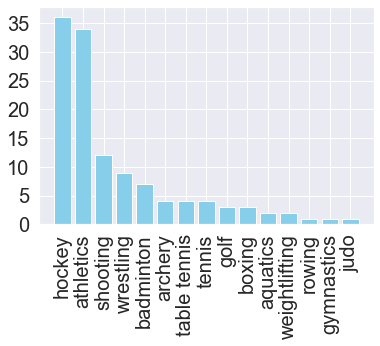

In [128]:
plt.bar(Ind.index,Ind["sport"],color="skyblue")
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)

In [129]:
mask2=data["Total"]!=0
data[mask1 & mask2][["name","nationality","sex","sport"]].reset_index(drop=True)

,name,nationality,sex,sport
0,Sakshi Malik,IND,female,wrestling
1,V. Sindhu Pusarla,IND,female,badminton


# Top Perfomers(Male)

In [130]:
mask=data["sex"]=="male"

In [131]:
data[mask].nlargest(5,["gold","silver","bronze"])[["name","sport","nationality","gold","silver","bronze"]].reset_index(drop=True)

,name,sport,nationality,gold,silver,bronze
0,Michael Phelps,aquatics,USA,5,1,0
1,Jason Kenny,cycling,GBR,3,0,0
2,Ryan Murphy,aquatics,USA,3,0,0
3,Usain Bolt,athletics,JAM,3,0,0
4,Nathan Adrian,aquatics,USA,2,0,2


# Top Performers(Female)

In [132]:
mask=data["sex"]=="female"

In [133]:
data[mask].nlargest(5,["gold","silver","bronze"])[["name","sport","nationality","gold","silver","bronze"]].reset_index(drop=True)

,name,sport,nationality,gold,silver,bronze
0,Katie Ledecky,aquatics,USA,4,1,0
1,Simone Biles,gymnastics,USA,4,0,1
2,Katinka Hosszu,aquatics,HUN,3,1,0
3,Danuta Kozak,canoe,HUN,3,0,0
4,Simone Manuel,aquatics,USA,2,2,0


# Top Perfomers in each Sport Category

In [134]:
sports=data.groupby(["sport","sex"])
len(sports)

56

In [135]:
df=pd.DataFrame(columns=data.columns)
for sport,i in sports:
    highest_tally=i.nlargest(1,"Total")
    df=df.append(highest_tally)
df[["name","sex","sport","gold","silver","bronze"]].reset_index(drop=True)

,name,sex,sport,gold,silver,bronze
0,Katie Ledecky,female,aquatics,4,1,0
1,Michael Phelps,male,aquatics,5,1,0
2,Bobae Ki,female,archery,1,0,1
3,Bonchan Ku,male,archery,2,0,0
4,Allyson Felix,female,athletics,2,1,0
5,Andre de Grasse,male,athletics,0,1,2
6,Ayaka Takahashi,female,badminton,1,0,0
7,Nan Zhang,male,badminton,1,0,1
8,Alba Torrens,female,basketball,0,1,0
9,Alex Abrines,male,basketball,0,0,1


# Medal Tally (Top Tens)

In [136]:
country=data.groupby("nationality")
topten=country.agg({"gold":["sum"],
              "silver":["sum"],
              "bronze":["sum"]})
topten.columns

MultiIndex([(  'gold', 'sum'),
            ('silver', 'sum'),
            ('bronze', 'sum')],
           )

In [137]:
topten=topten.sort_values(by=[(  'gold', 'sum'),
            ('silver', 'sum'),
            ('bronze', 'sum')],ascending=False).head(10)
topten.columns=["gold","silver","bronze"]      
topten

,gold,silver,bronze
nationality,,,
USA,139,54,71
GBR,64,55,26
RUS,52,29,34
GER,49,44,67
CHN,46,30,37
BRA,37,8,6
AUS,23,34,25
ARG,21,1,0
FRA,20,54,21


In [138]:
topten.index

Index(['USA', 'GBR', 'RUS', 'GER', 'CHN', 'BRA', 'AUS', 'ARG', 'FRA', 'JPN'], dtype='object', name='nationality')

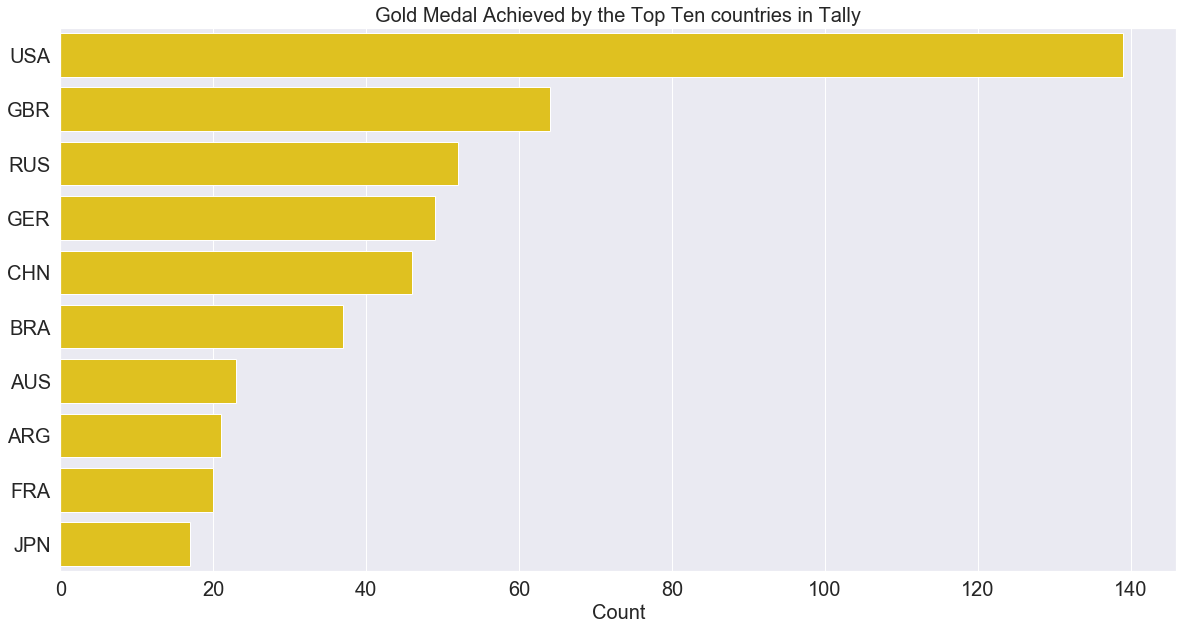

In [139]:
plt.figure(figsize=(20,10))
sns.barplot(data=topten,x="gold",y=['USA', 'GBR', 'RUS', 'GER', 'CHN', 'BRA', 'AUS', 'ARG', 'FRA', 'JPN'],color="gold")
plt.title("Gold Medal Achieved by the Top Ten countries in Tally",size=20)
plt.yticks(size=20)
plt.xticks(size=20)
plt.xlabel("Count",size=20)
plt.show()

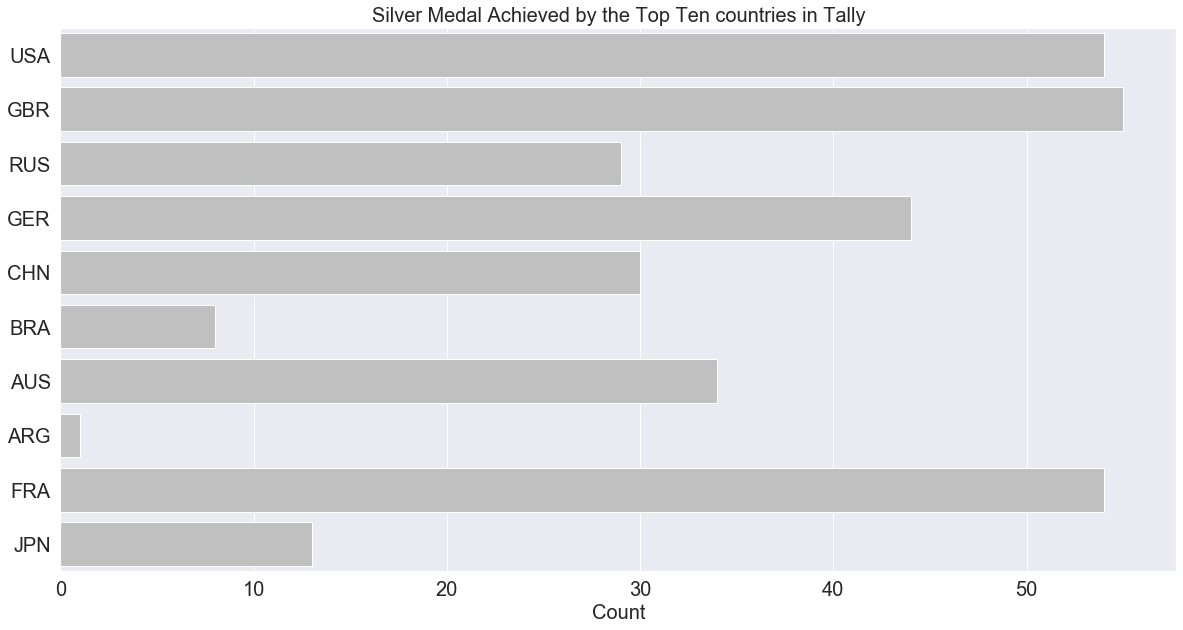

In [140]:
plt.figure(figsize=(20,10))
sns.barplot(data=topten,x="silver",y=['USA', 'GBR', 'RUS', 'GER', 'CHN', 'BRA', 'AUS', 'ARG', 'FRA', 'JPN'],color="silver")
plt.title("Silver Medal Achieved by the Top Ten countries in Tally",size=20)
plt.yticks(size=20)
plt.xticks(size=20)
plt.xlabel("Count",size=20)
plt.show()

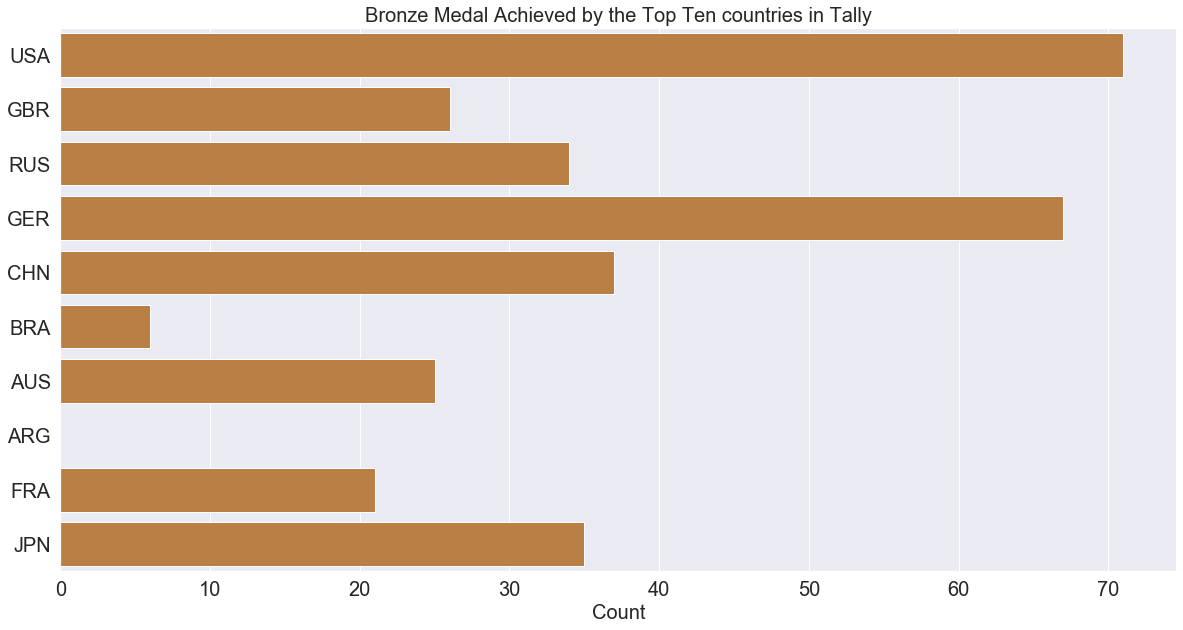

In [141]:
plt.figure(figsize=(20,10))
sns.barplot(data=topten,x="bronze",y=['USA', 'GBR', 'RUS', 'GER', 'CHN', 'BRA', 'AUS', 'ARG', 'FRA', 'JPN'],color="#CD7F32")

plt.title("Bronze Medal Achieved by the Top Ten countries in Tally",size=20)
plt.yticks(size=20)
plt.xticks(size=20)
plt.xlabel("Count",size=20)
plt.show()

# Athlete Characteristics

In [142]:
stats=data[["height","weight"]].mean().round(2)
stats


height     1.77
weight    72.07
dtype: float64

In [143]:
stats=data.groupby(["sport","sex"])

In [144]:
stats=stats[["height","weight"]].mean().round(2)


In [145]:
stats

height  weight
sport             sex                   
aquatics          female    1.72   62.56
                  male      1.86   81.86
archery           female    1.68   64.42
                  male      1.80   79.95
athletics         female    1.70   60.94
                  male      1.81   74.58
badminton         female    1.69   61.84
                  male      1.80   76.01
basketball        female    1.83   75.35
                  male      2.00   99.71
boxing            female    1.68   72.07
                  male      1.76   72.07
canoe             female    1.70   66.66
                  male      1.82   82.15
cycling           female    1.68   60.62
                  male      1.79   72.55
equestrian        female    1.68   59.11
                  male      1.79   72.93
fencing           female    1.71   62.73
                  male      1.83   78.73
football          female    1.68   61.14
                  male      1.79   74.27
golf              female    1.69   63.80
                  male      1.79   78.89
gymnastics        female    1.62   49.66
                  male      1.68   63.56
handball          female    1.76   70.89
                  male      1.91   95.43
hockey            female    1.67   60.43
                  male      1.80   77.38
judo              female    1.67   65.39
                  male      1.78   83.99
modern pentathlon female    1.70   58.00
                  male      1.83   73.92
rowing            female    1.77   69.84
                  male      1.90   86.24
rugby sevens      female    1.68   66.67
                  male      1.83   90.33
sailing           female    1.69   63.41
                  male      1.81   77.03
shooting          female    1.65   62.86
                  male      1.78   80.81
table tennis      female    1.66   58.04
                  male      1.79   72.56
taekwondo         female    1.73   61.60
                  male      1.86   74.77
tennis            female    1.74   64.91
                  male      1.86   80.26
triathlon         female    1.68   54.56
                  male      1.79   66.91
volleyball        female    1.83   70.70
                  male      1.96   89.42
weightlifting     female    1.60   68.79
                  male      1.71   87.54
wrestling         female    1.65   61.90
                  male      1.76   85.21

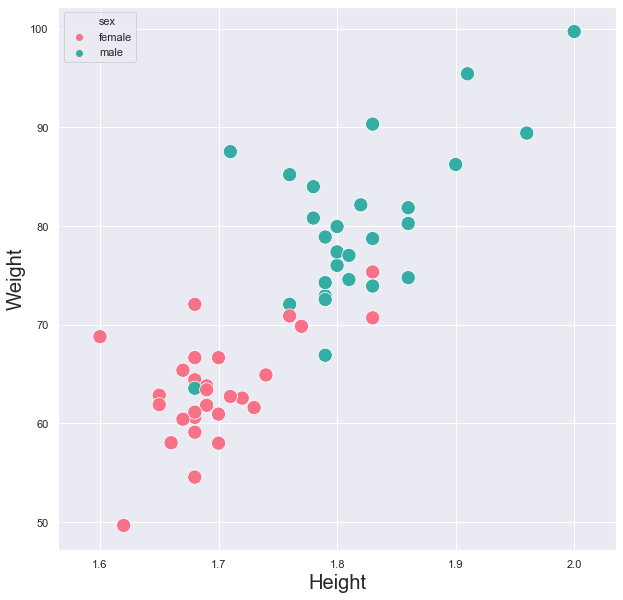

In [146]:
plt.figure(figsize=(10,10))
sns.scatterplot(stats["height"],stats["weight"],hue=stats.index.get_level_values(1),s=200,palette="husl")
plt.xlabel("Height",size=20)
plt.ylabel("Weight",size=20)
plt.show()

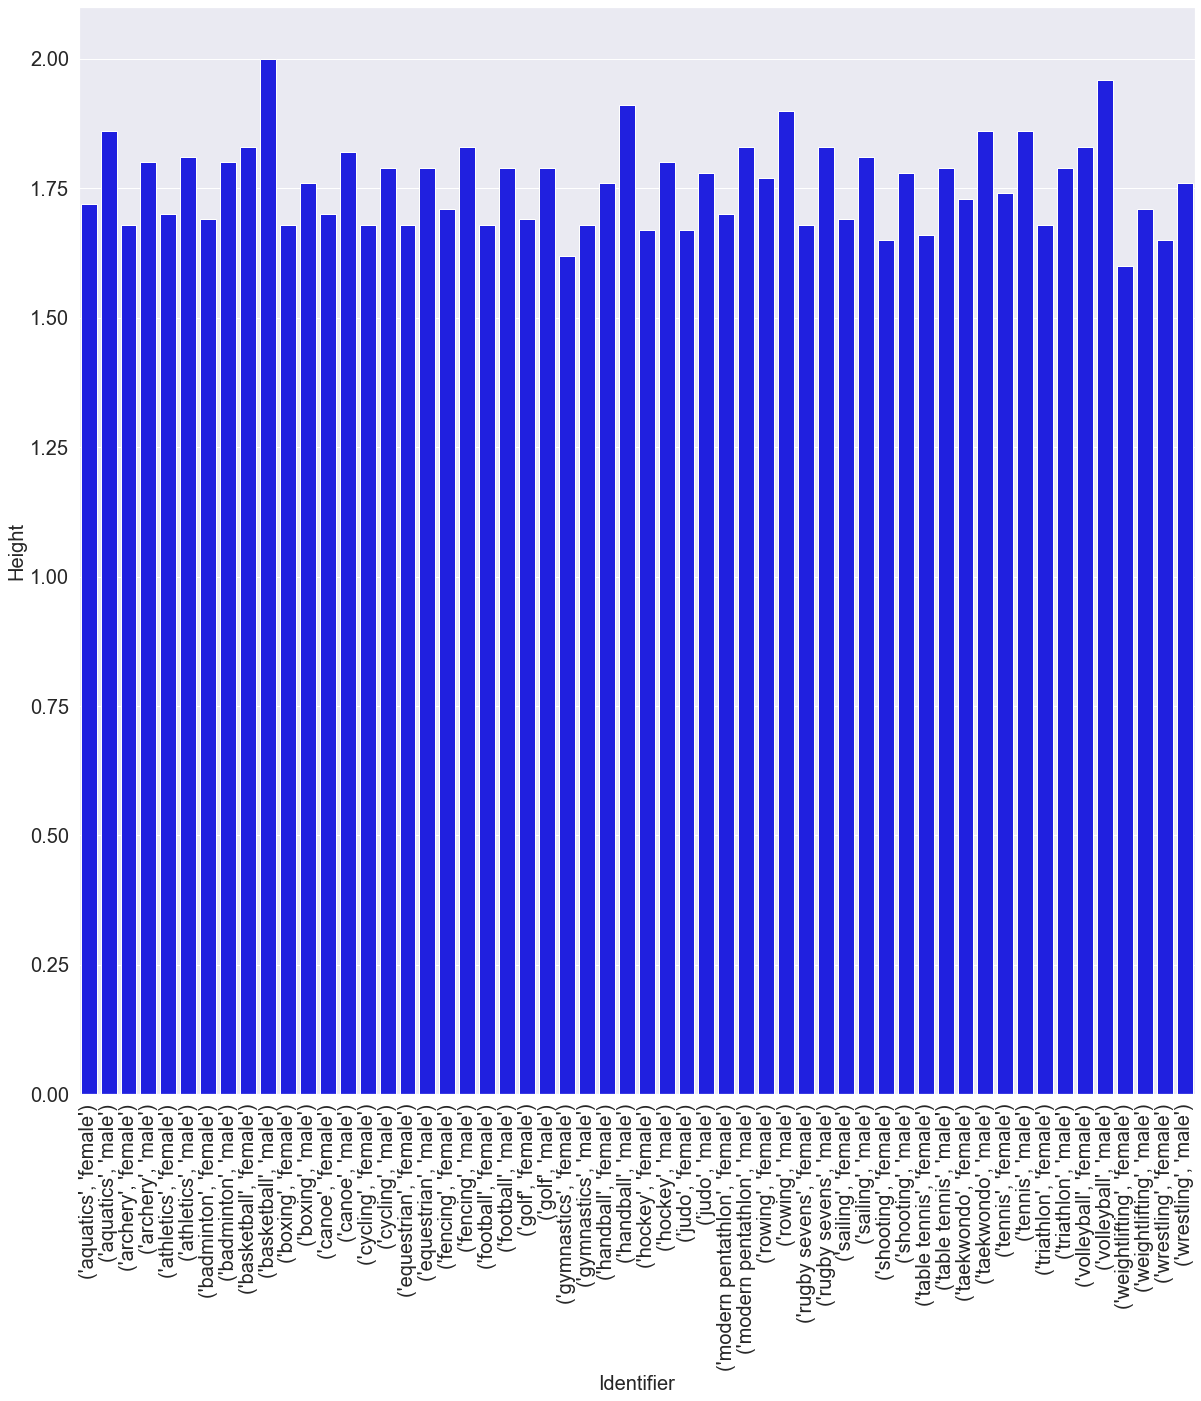

In [167]:
plt.figure(figsize=(20,20))
sns.barplot(y=stats["height"],x=stats.index,color="blue")
plt.xlabel("Identifier",size=20)
plt.ylabel("Height",size=20)

plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.show()